## **Sentimental Analysis for tweets**

This project is Sentimental Analysis from tweets on twitter. I want to predict if any person depressed or not from their tweets on twitter by using Machine Learning. This would be very helpful for detecting depressed people from their message.

Dataset from: https://www.kaggle.com/datasets/gargmanas/sentimental-analysis-for-tweets?resource=download

This code is authorized by Nuti Taynawa

### Data Preparation

In [ ]:
# Import importance libraries

import pandas as pd
from nltk.tokenize import word_tokenize

In [ ]:
df = pd.read_csv("/content/sentiment_tweets3.csv")
df.head(10)

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
5,624,so sleepy. good times tonight though,0
6,701,"@SilkCharm re: #nbn as someone already said, d...",0
7,808,23 or 24ï¿½C possible today. Nice,0
8,1193,nite twitterville workout in the am -ciao,0
9,1324,"@daNanner Night, darlin'! Sweet dreams to you",0


The data is seem very uncleaned, it is included special characters and some clickbait tweets, therefore I have to clean the data first.

I will clean the data by removing special characters (like @, !, # etc.), clickbait tweets (removing http:// and www.) and tagging (for example @Donald) with Regular Expression.

In [ ]:
# Applying Regular Expression on the message

df['message to examine'] = df['message to examine'].str.replace(r'@[A-Za-z0-9]+|http?://\S+|www.\S+|[^A-Za-z0-9 ]+',"") 
df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,Index,message to examine,label (depression result)
0,106,just had a real good moment i missssssssss him...,0
1,217,is reading manga,0
2,220,,0
3,288,Need to send em to my accountant tomorrow Odd...,0
4,540,ADD ME ON MYSPACE myspacecomLookThunder,0
5,624,so sleepy good times tonight though,0
6,701,re nbn as someone already said does fiber to ...,0
7,808,23 or 24C possible today Nice,0
8,1193,nite twitterville workout in the am ciao,0
9,1324,Night darlin Sweet dreams to you,0


The data is looks cleaner now, it's time for data preprocessing to changing the message to a proper form.

In [ ]:
import nltk
import numpy as np
nltk.download('punkt')

# Doing word tokenization

message_list = df['message to examine'].to_list()
word_list = list()
sentimental_label = list()
for i in range(len(message_list)):
  temp_str = word_tokenize(message_list[i])
  if temp_str:
    sentimental_label.append(df['label (depression result)'].to_list()[i])
    word_list.append(temp_str)

# Assert will be raised if I preprocess the data wrong.

assert len(sentimental_label) == np.shape(word_list)[0], "size of label and preprocessed data is not equal!!"

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [ ]:
# Finding how many word in the dataset

unique, counts = np.unique(np.array(sum(word_list, [])), return_counts=True)
result = np.column_stack((unique, counts)) 
word_range = result.shape[0]
print("There are {} word in the dataset".format(word_range))

There are 21553 word in the dataset


In [ ]:
# Finding the maximum length of sentence in the messages

max_length = max(len(x) for x in word_list)
print("Maximum length in the sentence is {}".format(max_length))

Maximum length in the sentence is 69


In [ ]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Preprocessing text data with pad sequence

token_list = [' '.join(str) for str in word_list]
onehot_token = [one_hot(words, word_range)for words in token_list]
pad_sec_tk = pad_sequences(onehot_token,max_length)

In [ ]:
pad_sec_tk

array([[    0,     0,     0, ..., 14519, 18958,  4350],
       [    0,     0,     0, ...,    87,  6712,  5224],
       [    0,     0,     0, ..., 15546, 10092,  2787],
       ...,
       [    0,     0,     0, ..., 12085,  2892, 13231],
       [    0,     0,     0, ...,  6894,  4304, 20933],
       [    0,     0,     0, ...,     0,     0,  6684]], dtype=int32)

In [ ]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split

# Train test split with ratio 66:33 or 1:3

x_train, x_test, y_train, y_test = train_test_split(pad_sec_tk,np.array(sentimental_label),test_size = 0.33, random_state = 42)

Now the data is ready for training with Machine Learning 🙂.

### Model Development

For this task I will classify depression message with LSTM model, because our text is the sequence of words and LSTM is also good for handling with the sequence data.

In [ ]:
from tensorflow.keras.layers import LSTM, Embedding, Dense, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(word_range, 50, input_length = max_length))
model.add(LSTM(64))
model.add(Dropout(0.3))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.fit(x_train,y_train,validation_split = 0.1,batch_size = 32,epochs = 10)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 69, 50)            1077650   
                                                                 
 lstm_4 (LSTM)               (None, 64)                29440     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,107,155
Trainable params: 1,107,155
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
194/194 [==============================] - 13s 55ms/step - loss: 0.2758 - accuracy: 0.8867 - val_loss: 0.0470 - val_accuracy: 0.9899
Epoch 2/10
194/194 [============

### Model Evaluation



In [ ]:
# Evaluate the model with testing set

model.evaluate(x_test,y_test)

107/107 [==============================] - 1s 11ms/step - loss: 0.0782 - accuracy: 0.9868


[0.0782068744301796, 0.9867569208145142]

In [ ]:
# Model prediction

y_hat = model.predict(x_test)

In [ ]:
# Changing from propability output to binary label(0 and 1)

y_pred = list()
for item in y_hat:
  if item >= 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
from sklearn.metrics import classification_report

# Showing classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2641
           1       0.97      0.97      0.97       757

    accuracy                           0.99      3398
   macro avg       0.98      0.98      0.98      3398
weighted avg       0.99      0.99      0.99      3398



My model is working well. It did 99% accuracy which is very high 😄

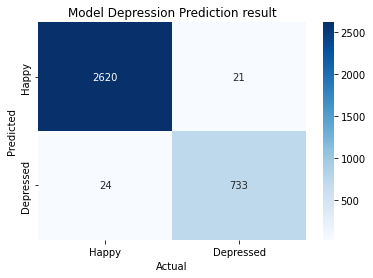

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Result visualization
df_res = pd.crosstab(y_test,np.array(y_pred))
df_res = df_res.rename(columns={0:"Happy", 1:"Depressed"},index ={0:"Happy", 1:"Depressed"})

sns.heatmap(df_res,cmap = 'Blues', annot=True, fmt="d")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Model Depression Prediction result")
plt.show()

### Converting IPYNB to PDF

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Sentimental_Analysis_twitter.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Sentimental_Analysis_twitter.ipynb to pdf
[NbConvertApp] Writing 42989 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 56481 bytes to /content/drive/My Drive/Sentimental_Analysis_twitter.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'